In [20]:
# We import these lines for debugging purposes, only works on Jupyter Notebook
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
from matplotlib import pyplot as plt
import numpy as np
from rocketpy import SolidMotor, StochasticSolidMotor, CustomSampler

In [22]:
class GaussianMixture(CustomSampler):

    def __init__(self, means_tuple, sd_tuple, prob_tuple, seed = None):
        """ Creates a sampler for a mixture of two Gaussians

        Parameters
        ----------
        means_tuple : 2-tuple
            2-Tuple that contains the mean of each normal distribution of the
            mixture
        sd_tuple : 2-tuple
            2-Tuple that contains the sd of each normal distribution of the
            mixture
        prob_tuple : 2-tuple
            2-Tuple that contains the probability of each normal distribution of the
            mixture
        """
        np.random.default_rng(seed)
        self.means_tuple = means_tuple
        self.sd_tuple = sd_tuple
        self.prob_tuple = prob_tuple
    
    def sample(self, n_samples = 1):
        sample_list = [0] * n_samples
        mixture_id_list = np.random.binomial(1, self.prob_tuple[0], n_samples)
        for i, mixture_id in enumerate(mixture_id_list):
            if mixture_id:
                sample_list[i] = np.random.normal(self.means_tuple[0], self.sd_tuple[0])
            else:
                sample_list[i] = np.random.normal(self.means_tuple[1], self.sd_tuple[1])

        return sample_list
    
    def reset_seed(self, seed=None):
        np.random.default_rng(seed)

In [23]:
total_impulse_sampler = GaussianMixture([6000, 7000], [200, 200], [0.5, 0.5])

In [24]:
motor = SolidMotor(
    thrust_source="data/motors/cesaroni/Cesaroni_M1670.eng",
    dry_mass=1.815,
    dry_inertia=(0.125, 0.125, 0.002),
    nozzle_radius=33 / 1000,
    grain_number=5,
    grain_density=1815,
    grain_outer_radius=33 / 1000,
    grain_initial_inner_radius=15 / 1000,
    grain_initial_height=120 / 1000,
    grain_separation=5 / 1000,
    grains_center_of_mass_position=0.397,
    center_of_dry_mass_position=0.317,
    nozzle_position=0,
    burn_time=3.9,
    throat_radius=11 / 1000,
    coordinate_system_orientation="nozzle_to_combustion_chamber",
)

In [ ]:
stochastic_motor = StochasticSolidMotor(
    solid_motor=motor,
    burn_start_time=(0, 0.1, "binomial"),
    grains_center_of_mass_position=0.001,
    grain_density=50,
    grain_separation=1 / 1000,
    grain_initial_height=1 / 1000,
    grain_initial_inner_radius=0.375 / 1000,
    grain_outer_radius=0.375 / 1000,
    total_impulse=total_impulse_sampler,
    throat_radius=0.5 / 1000,
    nozzle_radius=0.5 / 1000,
    nozzle_position=0.001,
)
stochastic_motor.visualize_attributes()

AssertionError: 'total_impulse' must be a tuple, list, int, or float

In [7]:
total_impulse_samples = [
    stochastic_motor.create_object().total_impulse for _ in range(300)
]

(array([3.08336103e-05, 3.08336103e-05, 3.39169713e-04, 6.16672205e-04,
        7.70840257e-04, 9.55841918e-04, 6.16672205e-04, 4.93337764e-04,
        5.24171375e-04, 1.54168051e-04, 1.85001662e-04, 1.54168051e-04,
        4.31670544e-04, 7.70840257e-04, 1.04834275e-03, 9.55841918e-04,
        5.85838595e-04, 2.77502492e-04, 1.85001662e-04, 1.23334441e-04]),
 array([5385.36421608, 5493.47135319, 5601.5784903 , 5709.68562741,
        5817.79276452, 5925.89990164, 6034.00703875, 6142.11417586,
        6250.22131297, 6358.32845008, 6466.43558719, 6574.54272431,
        6682.64986142, 6790.75699853, 6898.86413564, 7006.97127275,
        7115.07840987, 7223.18554698, 7331.29268409, 7439.3998212 ,
        7547.50695831]),
 <BarContainer object of 20 artists>)

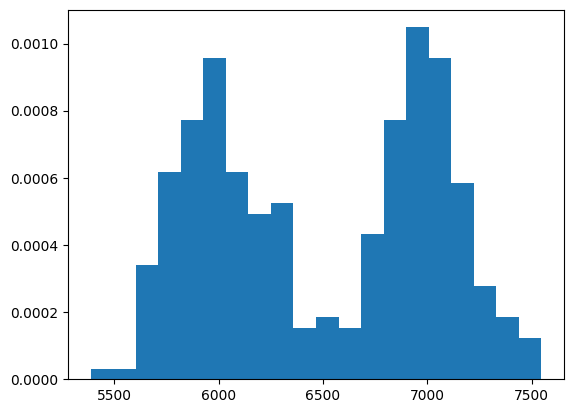

In [8]:
plt.hist(total_impulse_samples, density = True, bins = 20)